In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
df = pd.read_csv(r'csv_files\marketing_customer_analysis.csv')
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = cols
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [15]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [16]:
df.shape

(9134, 24)

In [17]:
df = df.dropna()

In [20]:
df_num = df.select_dtypes(include = np.number)
np.object = object    
df_cat = df.select_dtypes(include = np.object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

In [21]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [22]:
len(df.total_claim_amount.unique())

5106

In [24]:
df['total_claim_amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [ ]:
df = df.drop(['number_of_policies','number_of_open_complaints','months_since_last_claim','months_since_policy_inception','number_of_policies' ],axis=1)

In [ ]:
df_num.drop(['number_of_policies','months_since_last_claim','number_of_open_complaints','months_since_policy_inception','number_of_policies' ],axis=1, inplace=True)

In [35]:
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

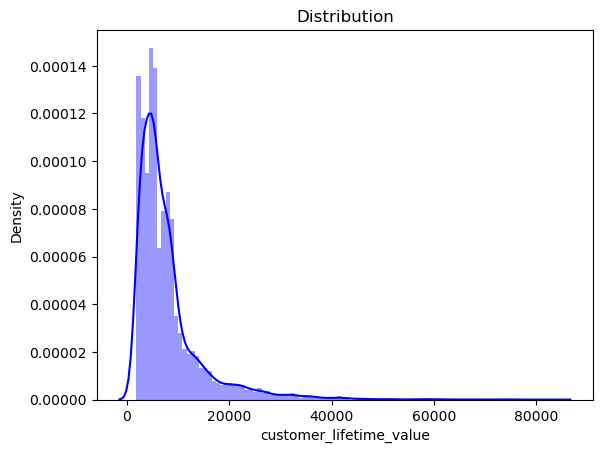

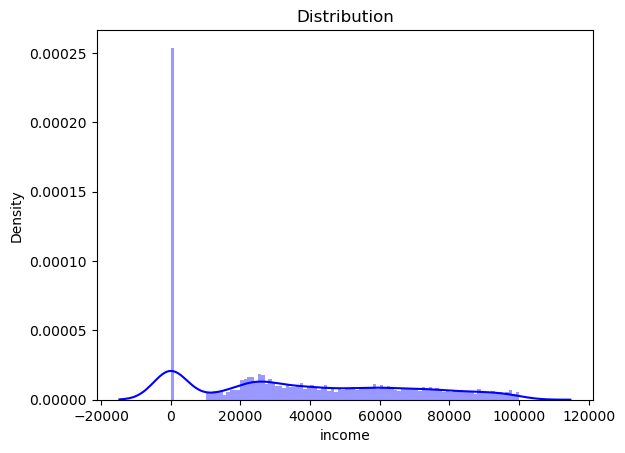

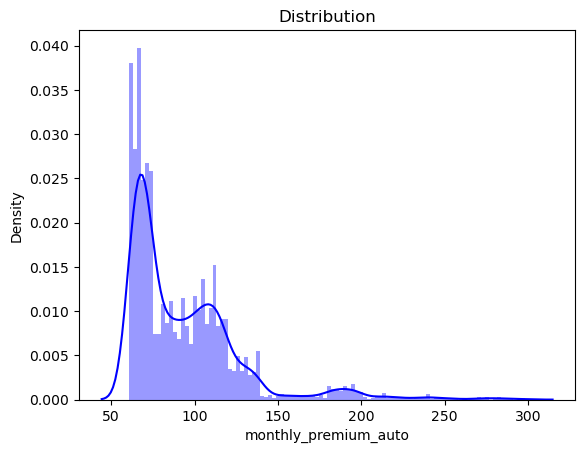

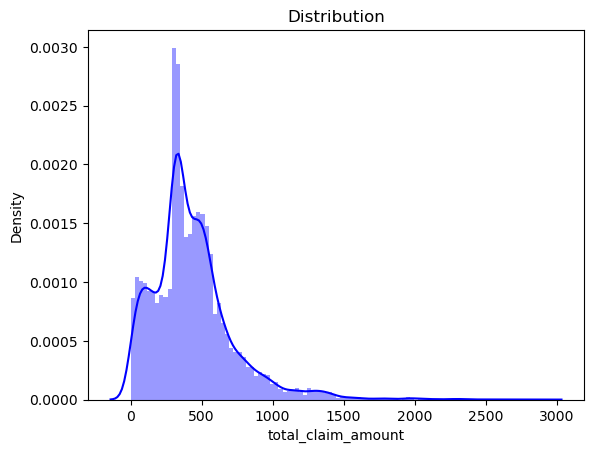

In [36]:
#Now we will try to check the normality of the numerical variables visually
#seaborn library is used to construct distribution plots for the numerical variables
for col in numerical_columns:
    sns.distplot(df_num[col],bins= 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

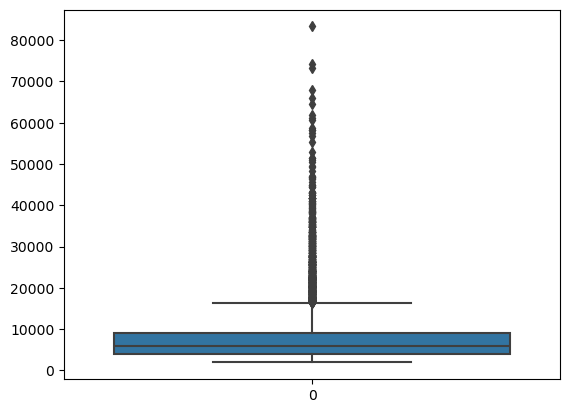

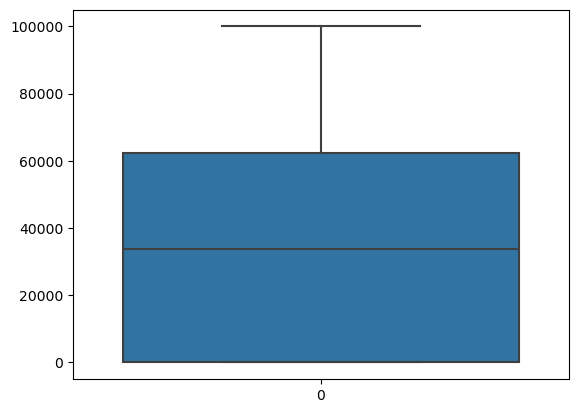

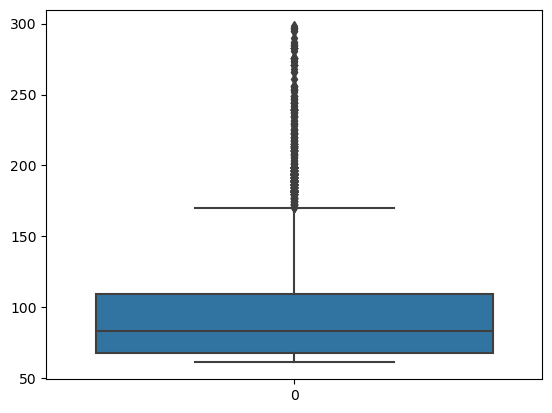

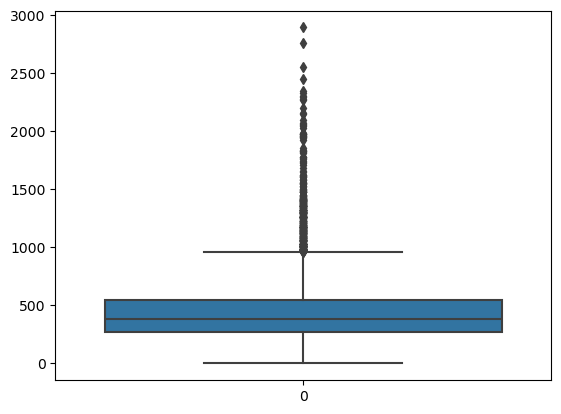

In [37]:
# checking for outliers
for col in numerical_columns:
    sns.boxplot(df_num[col])
    plt.show()

In [ ]:
df_num['customer_lifetime_value'].unique()

In [38]:
iqr = np.percentile(df_num['customer_lifetime_value'],75)-np.percentile(df_num['customer_lifetime_value'],25)
upper_limit = np.percentile(df_num['customer_lifetime_value'],75) +1.5*iqr
lower_limit = np.percentile(df_num['customer_lifetime_value'],75) -1.5*iqr
upper_limit, lower_limit

(16414.039911750002, 1510.2941707499995)

In [39]:
df = df[(df_num['customer_lifetime_value']>lower_limit) & (df_num['customer_lifetime_value']<upper_limit)]
df = df.reset_index()
df = df.drop(['index'], axis=1)

<Axes: >

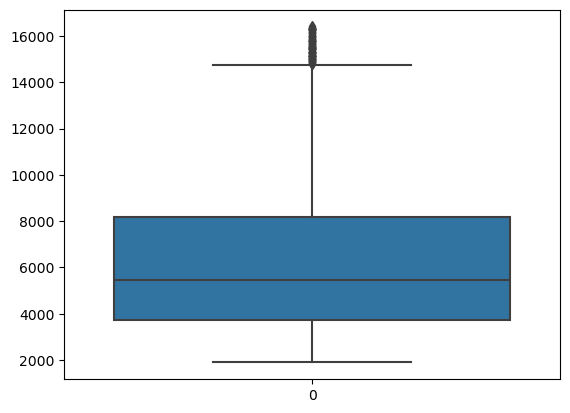

In [41]:
sns.boxplot(df['customer_lifetime_value'])

In [42]:
df_num['monthly_premium_auto'].unique()

array([ 69,  94, 108, 106,  73,  67, 101,  71,  93, 110,  70,  64,  72,
        74,  79,  61, 111, 139,  80,  63, 237,  65,  62, 117,  91,  90,
        66,  99, 103, 172,  92, 104, 113, 124, 105, 100, 112,  97,  95,
       102, 186,  77,  96,  76, 119,  88, 109, 107, 130,  85,  98, 133,
        86,  78,  83,  68, 192, 118,  89, 140, 127, 168, 126,  82, 115,
       217, 114, 138,  81, 255, 150, 123, 116, 190, 159,  84, 152, 136,
       245, 135, 128, 225, 132, 153, 121, 154, 161, 156, 171,  87, 244,
       183, 176, 230, 129, 177, 196, 131, 276, 253, 137, 180, 203, 147,
       165, 198, 125, 193, 271, 188, 142, 206, 182, 189, 160, 295, 210,
       134, 239, 256, 173, 285, 148, 197, 199, 214, 175, 167, 194, 164,
       181, 222, 215, 283, 169, 248, 223, 273, 151, 213, 145, 185, 287,
       297, 201, 149, 146, 235, 268, 211, 187, 141, 242, 170, 122, 143,
       155, 166, 212, 249, 240, 191, 195, 216, 144, 179, 232, 158, 207,
       184, 238, 229, 220, 178, 204, 281, 234, 218, 275, 209, 26

In [43]:
iqr1 = np.percentile(df_num['monthly_premium_auto'],75)-np.percentile(df_num['monthly_premium_auto'],25)
upper_limit1 = np.percentile(df_num['monthly_premium_auto'],75) +1.5*iqr1
lower_limit1 = np.percentile(df_num['monthly_premium_auto'],75) -1.5*iqr1
upper_limit1, lower_limit1

(170.5, 47.5)

In [45]:
df = df[(df_num['monthly_premium_auto'] > lower_limit1) & (df_num['monthly_premium_auto'] < upper_limit1)]
df = df.reset_index()
df = df.drop(['index'], axis=1)
df['monthly_premium_auto']

0        69
1        94
2       108
3       106
4        73
       ... 
7544    104
7545     79
7546     85
7547     96
7548     77
Name: monthly_premium_auto, Length: 7549, dtype: int64

In [46]:
iqr2 = np.percentile(df_num['total_claim_amount'],75)-np.percentile(df_num['total_claim_amount'],25)
upper_limit2 = np.percentile(df_num['total_claim_amount'],75) +1.5*iqr2
lower_limit2 = np.percentile(df_num['total_claim_amount'],75) -1.5*iqr2
upper_limit2, lower_limit2

(960.3997301249999, 134.62994737500003)

In [47]:
df = df[(df_num['total_claim_amount'] > lower_limit2) & (df_num['total_claim_amount'] < upper_limit2)]
df = df.reset_index()
df = df.drop(['index'], axis=1)
df['total_claim_amount']

0       384.811147
1       566.472247
2       529.881344
3       138.130879
4       159.383042
           ...    
6164    482.400000
6165    379.200000
6166    790.784983
6167    691.200000
6168    369.600000
Name: total_claim_amount, Length: 6169, dtype: float64

<Axes: >

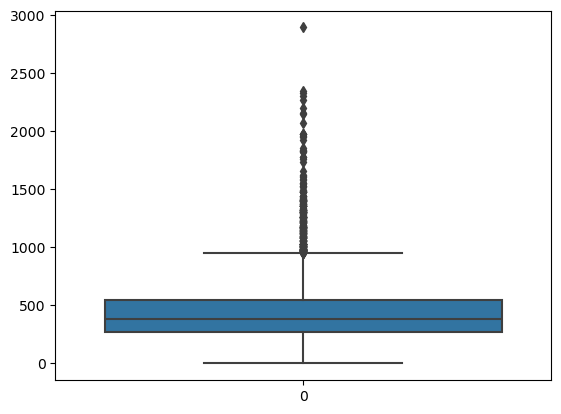

In [48]:
sns.boxplot(df['total_claim_amount'])

In [49]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = np.object)

In [50]:
df_num.rename(columns={'monthly_premium_auto': 'monthly_premium_auto_log', 'total_claim_amount': 'total_claim_amount_log',
                              'customer_lifetime_value': 'customer_lifetime_value_log'}, inplace = True)

In [57]:
# Standardization of the data and first the target value will be removed
numerical_features = df_num.drop(['total_claim_amount_log'],axis=1)
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical_features)
x_standard = transformer.transform(numerical_features)
print(x_standard)

[[-1.09517419  0.61595014 -0.7139498 ]
 [ 2.02371099  0.36844903  0.54347047]
 [ 0.40893462 -1.23936852  0.47898738]
 ...
 [ 0.56852428 -1.23936852 -0.19808507]
 [ 0.37152882 -0.51598745  0.15657193]
 [-1.14190316 -1.23936852 -0.45601744]]


In [65]:
cols=['customer_lifetime_value_log','income','monthly_premium_auto_log']
#converting the array to dataFrame
x_standard=pd.DataFrame(x_standard,columns=cols)
x_standard

,customer_lifetime_value_log,income,monthly_premium_auto_log
0,-1.095174,0.615950,-0.713950
1,2.023711,0.368449,0.543470
2,0.408935,-1.239369,0.478987
3,-1.079717,0.205877,-0.584984
4,0.596992,0.834471,-0.713950
...,...,...,...
6164,-0.520475,-1.239369,-0.778433
6165,-0.992589,-0.527098,-0.391534
6166,0.568524,-1.239369,-0.198085
6167,0.371529,-0.515987,0.156572


In [66]:
df_cat['gender'].unique()

array(['female', 'male'], dtype=object)

In [67]:
df_cat['gender'] = df_cat['gender'].replace({'M':'male', 'F':'female'})
df_cat['gender']

0       female
1       female
2         male
3         male
4       female
         ...  
6164      male
6165    female
6166      male
6167      male
6168      male
Name: gender, Length: 6169, dtype: object

In [68]:
# For columns 'coverage' and 'education' LabelEncoder could be used because they are ordinal data

label1 = preprocessing.LabelEncoder()
df_cat['education'] = label1.fit_transform(df_cat['education'])
df_cat['education']

0       4
1       4
2       4
3       4
4       4
       ..
6164    4
6165    1
6166    4
6167    1
6168    1
Name: education, Length: 6169, dtype: int64

In [69]:
df_cat['education'] = df_cat['education'].replace({0:2, 1:1, 2:4, 3:0, 4:3})
df_cat['education']

0       3
1       3
2       3
3       3
4       3
       ..
6164    3
6165    1
6166    3
6167    1
6168    1
Name: education, Length: 6169, dtype: int64

In [70]:
label2 = preprocessing.LabelEncoder()
df_cat['coverage'] = label2.fit_transform(df_cat['coverage'])
df_cat['coverage']

0       0
1       2
2       0
3       0
4       0
       ..
6164    0
6165    1
6166    1
6167    1
6168    1
Name: coverage, Length: 6169, dtype: int64

In [ ]:
# columns 'customer' and 'effective_to_date' could be removed because they do not contain useful information
df_cat = df_cat.drop(['customer','effective_to_date'], axis = 1)
df_cat

In [72]:
# Concatanating numerical and categorical variable to have a single dataframe x
x = pd.concat([x_standard, df_cat],axis= 1)
x

,customer_lifetime_value_log,income,monthly_premium_auto_log,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,-1.095174,0.615950,-0.713950,Washington,No,0,3,Employed,female,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,2.023711,0.368449,0.543470,Nevada,No,2,3,Employed,female,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,0.408935,-1.239369,0.478987,California,No,0,3,Unemployed,male,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
3,-1.079717,0.205877,-0.584984,Washington,No,0,3,Employed,male,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,0.596992,0.834471,-0.713950,Oregon,Yes,0,3,Employed,female,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,-0.520475,-1.239369,-0.778433,California,No,0,3,Unemployed,male,Suburban,Single,Corporate Auto,Corporate L1,Offer1,Branch,Two-Door Car,Medsize
6165,-0.992589,-0.527098,-0.391534,California,Yes,1,1,Employed,female,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
6166,0.568524,-1.239369,-0.198085,California,No,1,3,Unemployed,male,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
6167,0.371529,-0.515987,0.156572,California,No,1,1,Employed,male,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [73]:
x = pd.get_dummies(x,drop_first=True)
x

,customer_lifetime_value_log,income,monthly_premium_auto_log,coverage,education,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_male,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-1.095174,0.615950,-0.713950,0,3,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,2.023711,0.368449,0.543470,2,3,False,True,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,0.408935,-1.239369,0.478987,0,3,True,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
3,-1.079717,0.205877,-0.584984,0,3,False,False,False,True,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0.596992,0.834471,-0.713950,0,3,False,False,True,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,-0.520475,-1.239369,-0.778433,0,3,True,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
6165,-0.992589,-0.527098,-0.391534,1,1,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
6166,0.568524,-1.239369,-0.198085,1,3,True,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
6167,0.371529,-0.515987,0.156572,1,1,True,False,False,False,False,True,False,False,False,True,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


In [74]:
y = df_num['total_claim_amount_log']
y

0       384.811147
1       566.472247
2       529.881344
3       138.130879
4       159.383042
           ...    
6164    482.400000
6165    379.200000
6166    790.784983
6167    691.200000
6168    369.600000
Name: total_claim_amount_log, Length: 6169, dtype: float64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=100)

In [78]:
# Applying linear regression

def r2(y, y_pred):
    return r2_score(y, y_pred)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
    return (rmse)
def mse(y, y_pred):
    return mean_squared_error(y, y_pred) 
def mae(y, y_pred):
    return mean_absolute_error(y, y_pred) 

# Linear Regression

lreg = LinearRegression()
lreg_model = lreg.fit(X_train, y_train)
y_pred = lreg_model.predict(X_test)
y_pred_train = lreg_model.predict(X_train)

In [79]:
scores = {'R2':[r2(y_test, y_pred),r2(y_train, y_pred_train)],'MSE': [mse(y_test, y_pred),mse(y_train, y_pred_train)],'RMSE':[rmse(y_test, y_pred),rmse(y_train, y_pred_train)],'MAE':[mae(y_test, y_pred),mae(y_train, y_pred_train)]}

final_score = pd.DataFrame(scores, index=['scores of test set', 'scores of training set'])
final_score 

,R2,MSE,RMSE,MAE
scores of test set,0.771383,18677.543517,136.665810,93.423386
scores of training set,0.766756,17768.742421,133.299446,92.126946
